# QuarentenaDados - Alura

### Aula 4 - Estatística do ENEM. Dados obtidos em: http://inep.gov.br/microdados

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do ENEM 2018. Esse será o primeiro passo para construir os modelos de machine learning da aula 05. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este link aqui.

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (pd.options.display.float_format), depois lendo e conhecendo as informações contidas na base de dados.

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


A saída do describe traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento. Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação.

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [2]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [3]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o .dropna() e trocamos os nomes das colunas para ficar mais legível.

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o .corr():

In [4]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre linguagem_codigo e ciencias_humanas, o que parece fazer sentido. Uma correlação que surpreende é entre linguagem_codigo e redacao. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente.

*Mais alguma correlação te chama a atenção? *

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido). Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

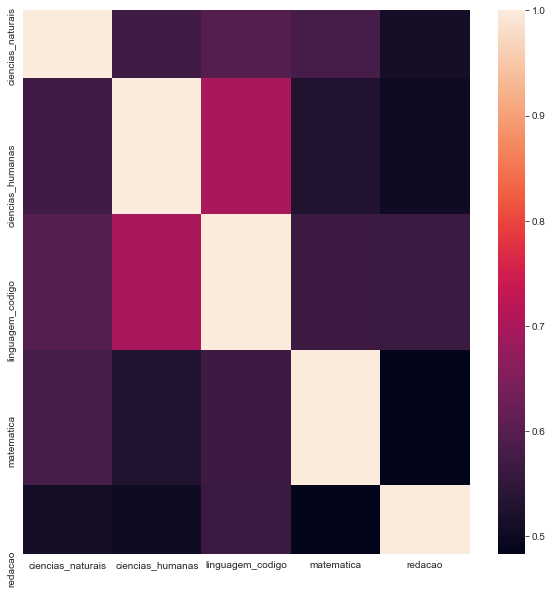

In [6]:
sns.set_style("white")
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo.

Então, vamos ao pairplot:

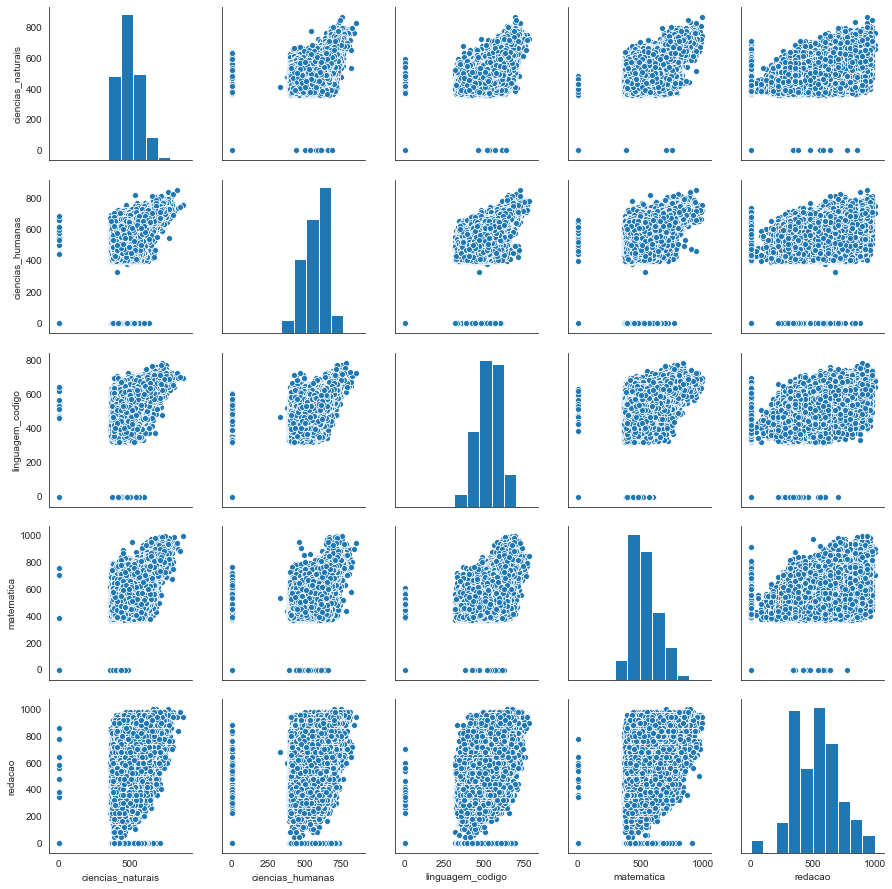

In [7]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!

P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

### Desafio 1 - Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

Criando um novo df para alterar os valores dos valores nulos. Considerando o que ocorre no mundo real, por qualquer motivo que a pessoa não tenha realizado a prova (ausencia, desistencia, anulada, etc) e o campo estiver nulo, substituirei por 0:

In [8]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas_2 = dados[colunas_de_notas]

In [9]:
dados_notas_2.isna().sum()

NU_NOTA_CN         40307
NU_NOTA_CH         34070
NU_NOTA_LC         34070
NU_NOTA_MT         40307
NU_NOTA_REDACAO    34070
dtype: int64

In [10]:
dados_notas_2.fillna(0, inplace=True)

C:\Python\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [11]:
dados_notas_2.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64

### Desafio 2 - A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

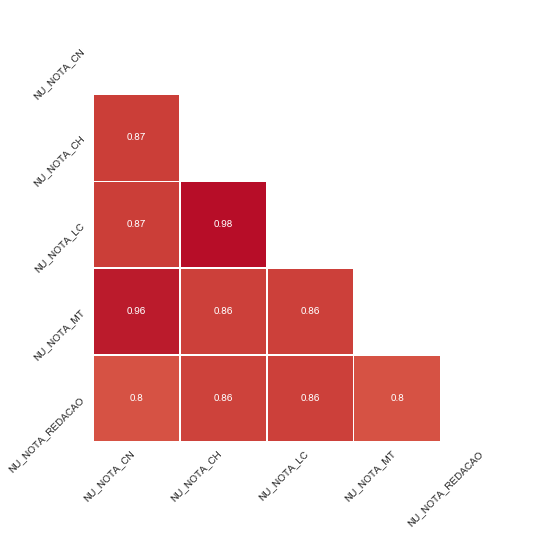

In [36]:
notas_corr = dados_notas_2.corr() 

#subjective_corr[np.abs(subjective_corr)<.2] = 0
# mask = np.zeros_like(notas_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))
g = sns.heatmap(notas_corr,
            vmin = -1,
            cmap='coolwarm',
            annot=True,
#             mask = mask,
            square=True,
            cbar_kws={'fraction' : 0.1},
            linewidth=.2,
            cbar=0)

bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')
plt.show();

# Reseta as configurações para o padrão
sns.set()

### Desafio 3 - Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

Essa foi feita com a ajuda da aula 5. :)

In [46]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2211001,Teresina,22,PI,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3557105,Votuporanga,35,SP,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,523.10,671.30,661.60,738.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2506301,Guarabira,25,PB,1.00,1.00,1.00,1.00,447.00,451.00,455.00,459.00,409.20,531.70,389.00,438.10,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",D

In [99]:
#dados.columns.values

In [69]:
dados_nota = dados.copy()

In [85]:
# Função que pega as respostas e gabaritos, e faz a contagem de quantas respostas batem entre as listas.
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [86]:
dados_nota['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota.apply(conta_acertos, materia='CN', axis=1)
dados_nota['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota.apply(conta_acertos, materia='CH', axis=1)
dados_nota['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota.apply(conta_acertos, materia='LC', axis=1)
dados_nota['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota.apply(conta_acertos, materia='MT', axis=1)

In [100]:
#Só por curiosidade, dando uma olhada no resultado do df
num_questoes_acertadas.sort_values('Matemática',ascending = False).head(10)

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
96872,44,40,33,43,940.00
60024,36,35,31,43,900.00
83768,26,28,33,42,740.00
66733,34,27,31,42,700.00
71193,33,29,28,42,860.00
33520,41,37,30,42,960.00
39302,25,28,28,41,500.00
100139,29,38,35,41,700.00
42567,39,36,35,41,960.00
81136,34,37,34,41,940.00


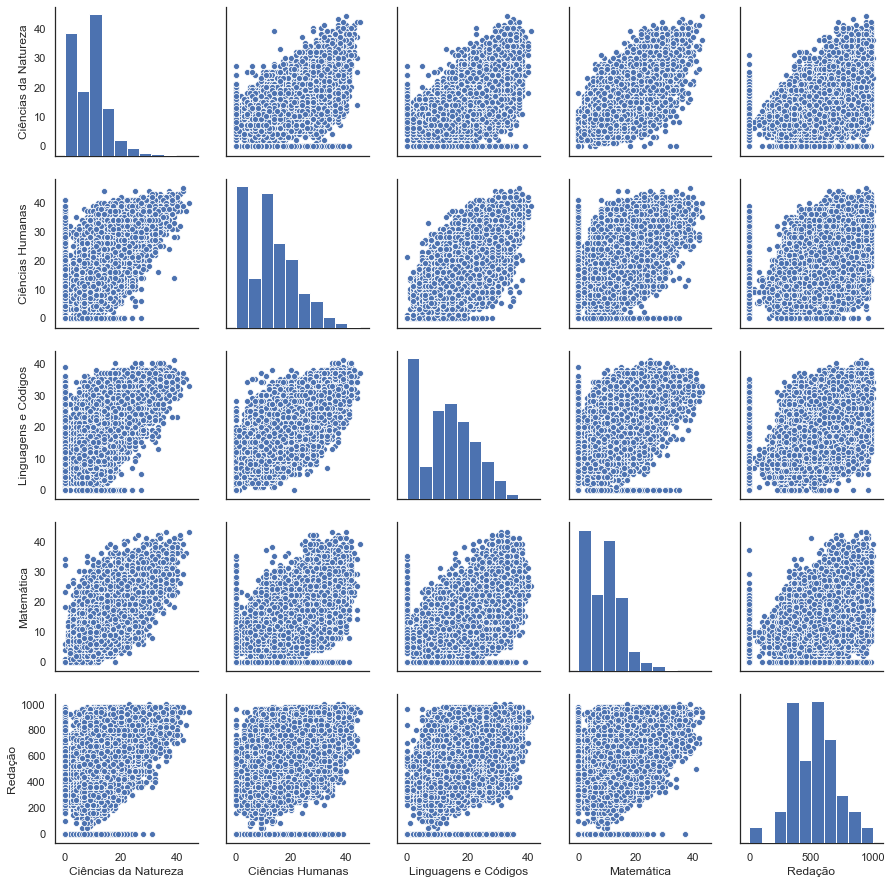

In [127]:
#Criando o plot
num_questoes_acertadas = dados_nota[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set_style("white")
sns.pairplot(num_questoes_acertadas)
sns.set()

### Desafio 4 - Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [106]:
dados_notas_2.isin([0]).sum()

NU_NOTA_CN         40325
NU_NOTA_CH         34259
NU_NOTA_LC         34157
NU_NOTA_MT         40334
NU_NOTA_REDACAO    36825
dtype: int64

In [122]:
dados_notas_2 = dados_notas_2.loc[(dados_notas_2!=0).all(axis=1)]

In [123]:
dados_notas_2.isin([0]).sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64

In [124]:
dados_notas_2.sort_values('NU_NOTA_CN')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
28232,362.50,578.60,409.10,370.30,320.00
2857,362.50,593.40,396.90,380.40,340.00
128120,362.50,669.20,477.20,499.00,600.00
71793,362.50,549.70,504.20,426.00,320.00
93848,362.60,402.00,382.00,420.20,240.00
...,...,...,...,...,...
33520,807.10,719.20,644.00,982.50,960.00
96734,831.40,850.40,725.90,943.20,940.00
106298,836.30,735.90,692.70,896.50,840.00
132198,848.10,740.40,702.30,880.70,980.00


### Desafio 5 - Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [125]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [131]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [145]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
# total_acertos_por_questao.reset_index(inplace=True)
# total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
# total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1


In [153]:
total_acertos_por_questao.head()

,Questão,Número de Acertos
0,1,5685
1,2,5413
2,3,9048
3,4,6457
4,5,5921


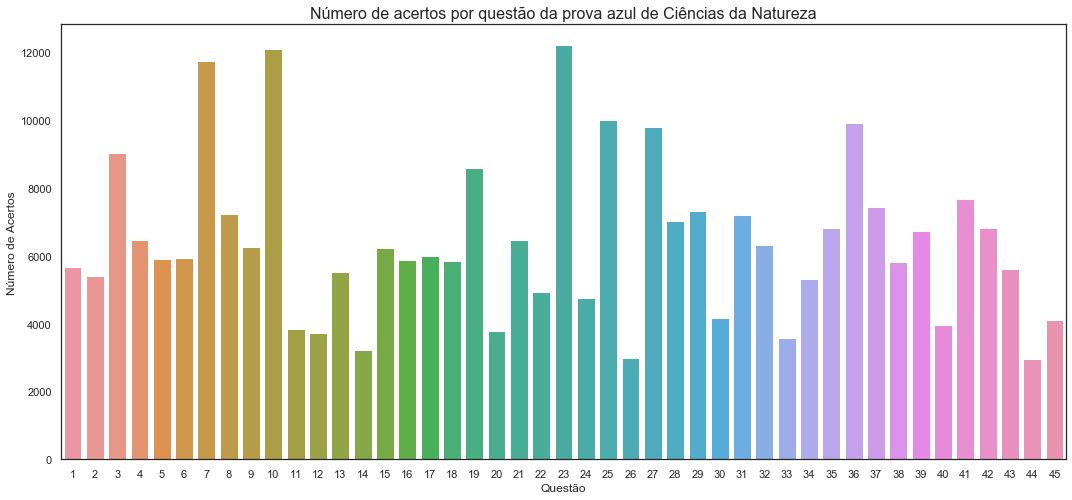

In [155]:
sns.set_style("white")
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

chart = sns.catplot(x="Questão", y="Número de Acertos", kind = "bar", data=total_acertos_por_questao,ci=None,palette='pastel',edgecolor='.7',height=5.5,aspect=2)
plt.title('Número de acertos por questão da prova azul de Ciências da Natureza',fontsize=16)
plt.show()

### Desafio 6 - Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

### Aula  5 - Modelo de Regressão e Machine Learning. Dados obtidos em: http://inep.gov.br/microdados

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [14]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos.

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [15]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo?

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o link para a documentação.

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [17]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão(Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o LinearSVR do scikit-learn:

In [18]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

C:\Python\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o .fit(), mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método .predict() do modelo.

In [19]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([507.82371068, 539.68470532, 507.63259622, 455.35972018,
       567.06769021])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [20]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

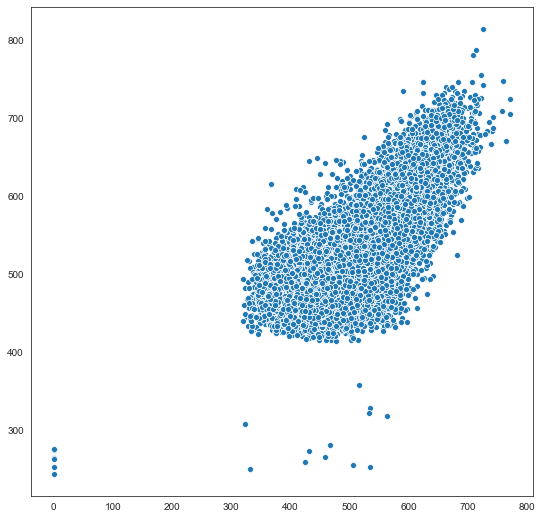

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

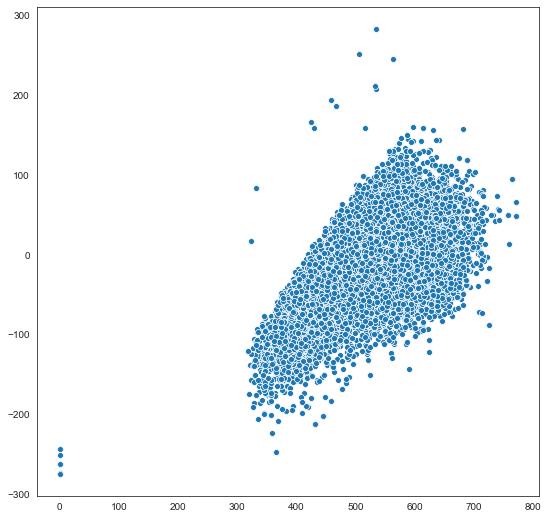

In [22]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

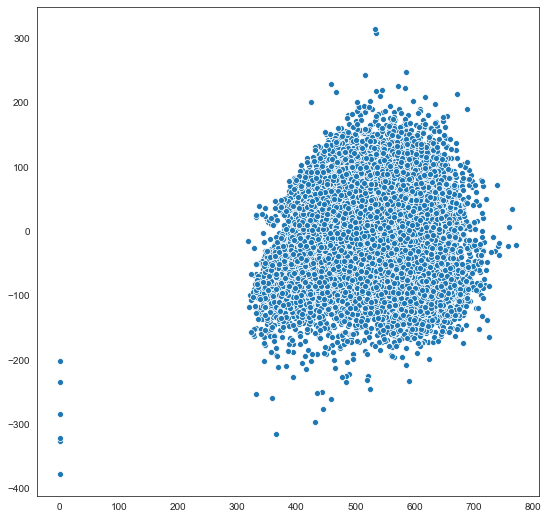

In [23]:
# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


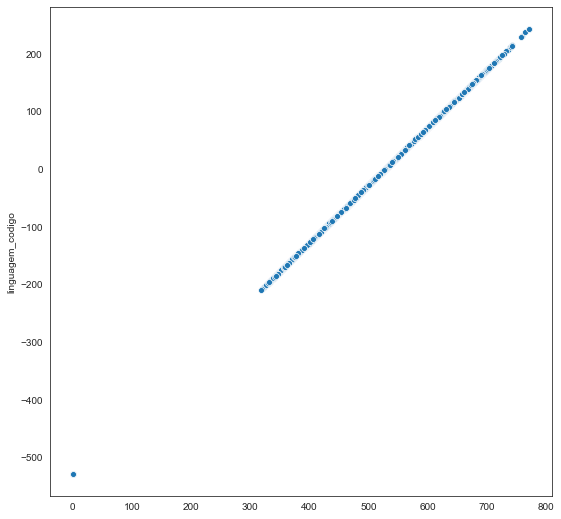

In [24]:

# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

Após discutir esses gráficos, vamos criar mais um modelo de machine learning basededo em "árvores":

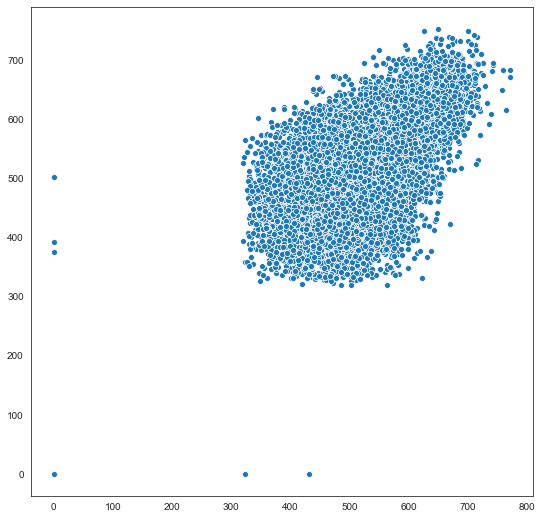

In [25]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

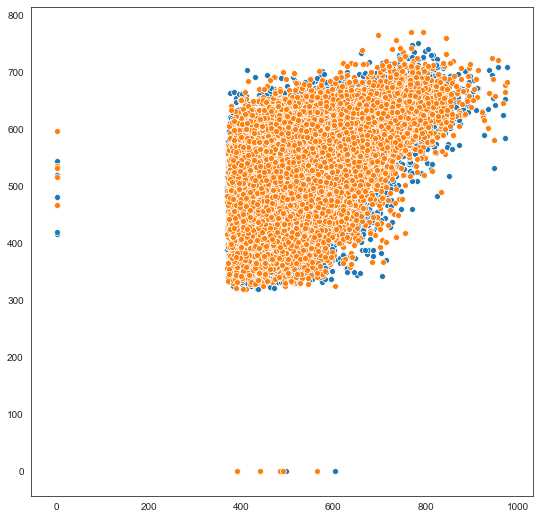

In [26]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o erro quadrático médio. Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo.

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4134.87676412534

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [28]:
mean_squared_error(y_teste, y_teste)

0.0

Nosso resultado é zero! Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos Dummy.

In [29]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.5388280703755

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua.

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado!

Participem também do nosso desafio final, valendo um Nintendo Switch.

Bons estudos e boa sorte!

Forte abraço!